## Introducción a la Clasificación

**Tratamiento de Señales III**

*Estudiantes:*

*Alahkdmovak Rúa Cardona*

*Harrison Andres Henao*


**Facultad de Ingeniería**

**Universidad de Antioquia**

2023-1

In [3]:
from google.colab import drive
from ipywidgets import interact
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **Base de datos**

In [4]:
!wget "https://raw.githubusercontent.com/alahkdmovak/PCA-y-clasificadores-lineales/f643823eecdceb57395ebf3c85543dd8caf18633/dataFrame.csv" -O "dataFrame.csv"

--2023-05-07 04:38:55--  https://raw.githubusercontent.com/alahkdmovak/PCA-y-clasificadores-lineales/f643823eecdceb57395ebf3c85543dd8caf18633/dataFrame.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71558 (70K) [text/plain]
Saving to: ‘dataFrame.csv’

dataFrame.csv       100%[===================>]  69.88K  --.-KB/s    in 0.006s  

2023-05-07 04:38:55 (10.8 MB/s) - ‘dataFrame.csv’ saved [71558/71558]



In [5]:
df = pd.read_csv('dataFrame.csv')

In [6]:
df

,Entropia,no_zero_crossings,no_mean_crossings,n5,n25,n75,n95,median,mean,std,var,rms,P_max,F_max,Media,Varianza,max_STFT,min_STFT,Energia,labels
0,8.540910,2457.0,2457.0,-0.028405,-0.014830,0.014402,0.030819,-0.000622,-1.835408e-06,0.018898,0.000357,0.015648,0.011037,25.996094,0.000487,7.373945e-07,0.011037,4.843520e-11,0.001335,Local
1,8.540910,2282.0,2282.0,-0.015640,-0.009022,0.007721,0.021198,-0.001290,-1.475312e-06,0.011802,0.000139,0.009504,0.005629,25.996094,0.000406,2.167187e-07,0.005629,1.084332e-10,0.000328,Local
2,8.540910,2594.0,2592.0,-0.013762,-0.005612,0.005172,0.014662,-0.000141,3.470603e-06,0.009355,0.000088,0.006952,0.003863,47.480469,0.000313,1.437474e-07,0.003863,4.432359e-10,0.000078,Local
3,8.489616,2652.0,2652.0,-0.019483,-0.007826,0.007659,0.019369,0.000188,1.984117e-06,0.012090,0.000146,0.009435,0.004974,32.226562,0.000374,2.633888e-07,0.004974,5.805333e-10,0.000103,Local
4,8.489616,3585.0,3585.0,-0.020306,-0.008274,0.008166,0.020380,0.000070,1.747138e-07,0.012473,0.000156,0.009840,0.004763,43.183594,0.000341,3.107104e-07,0.004763,1.368430e-09,0.000068,Local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,9.688312,6853.0,6853.0,-0.004259,-0.001602,0.001633,0.004102,0.000036,2.338661e-07,0.002640,0.000007,0.002014,0.001981,15.039062,0.000097,1.055117e-08,0.001981,3.353356e-11,0.000007,Telesismo
185,9.688312,12037.0,12037.0,-0.002972,-0.001153,0.001173,0.002904,0.000018,2.410427e-09,0.001878,0.000004,0.001431,0.001221,45.761719,0.000059,6.634448e-09,0.001221,1.063858e-10,0.000003,Telesismo
186,10.208617,3225.0,3225.0,-0.022433,-0.004968,0.005091,0.021863,0.000078,-8.745403e-08,0.015211,0.000231,0.009126,0.024241,1.933594,0.000243,6.027421e-07,0.024241,1.848362e-11,0.001714,Telesismo
187,10.208617,11333.0,11333.0,-0.004691,-0.001852,0.001898,0.004560,0.000051,9.396453e-08,0.002852,0.000008,0.002243,0.001534,14.179688,0.000107,1.217803e-08,0.001534,1.701899e-11,0.000013,Telesismo


## Lectura y extracción de datos del DataFrame.

> Bloc con sangría



In [22]:
X = df.iloc[:, :-1].values  # Selecciona todas las columnas excepto la última
Y = df.iloc[:, -1].values   # Selecciona la última columna

# Convertir la etiqueta en un array de enteros (opcional)

# Escalado de las caracteristicas

scaler = StandardScaler()
scaler.fit(X)
Xscaled = scaler.transform(X)

# Imprimir el número de ejemplos y características
print('Número de sismos:', X.shape[0])
print('Número de características:', X.shape[1])

Número de sismos: 189
Número de características: 19


# Aplicación de PCA

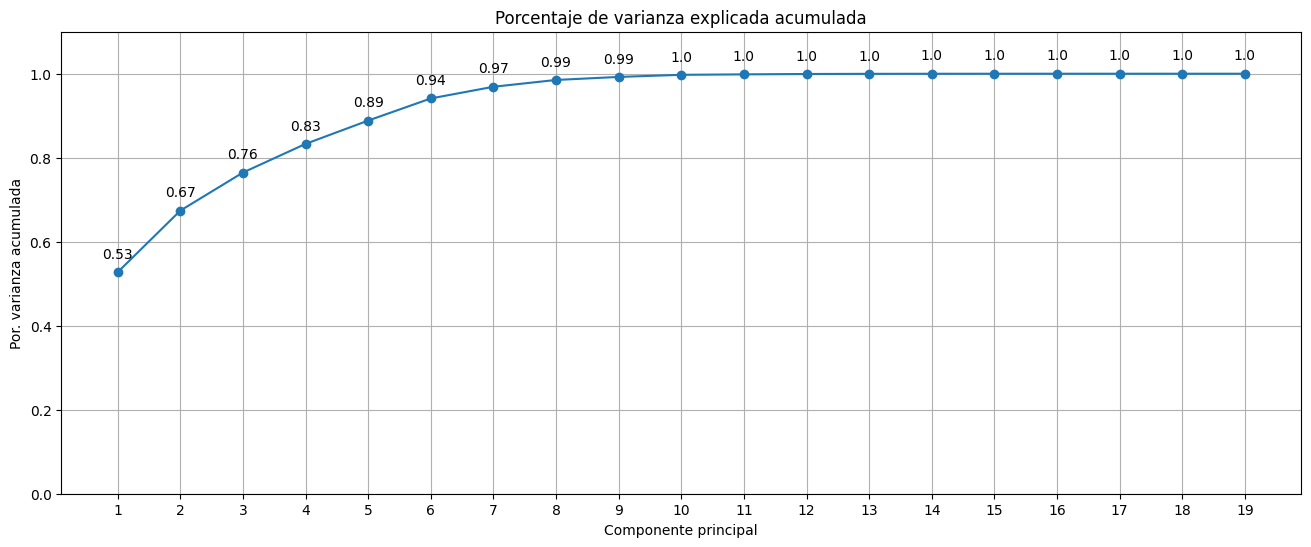

In [8]:
featuresMatrix_DF = pd.DataFrame(X)

# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(featuresMatrix_DF)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
ax.plot(
    np.arange(len(featuresMatrix_DF.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(featuresMatrix_DF.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');
ax.grid();

Basandose en la gráfica de porcentaje de varianza explicada acumulada se decide trabajar con los siguientes valores para PCA:

* 2 Componentes
* 5 Componentes
* 10 Componentes

Como es de esperarse, a mayor número de componentes, mayor será la varianza explicada.

In [9]:
# Creamos el modelo PCA
pca_2Components = PCA(n_components=2)
pca_5Components = PCA(n_components=5)
pca_10Components = PCA(n_components=10)


# Entrenamos el modelo y Transformamos los datos al espacio latente
XPCA2components = pca_2Components.fit_transform(Xscaled)
XPCA5components = pca_5Components.fit_transform(Xscaled)
XPCA10components = pca_10Components.fit_transform(Xscaled)

# print("original shape:   ", pca_2Components.shape)
print("transformed shape:", XPCA2components.shape)

# print("original shape:   ", pca_5Components.shape)
print("transformed shape:", XPCA5components.shape)

# print("original shape:   ", pca_9Components.shape)
print("transformed shape:", XPCA10components.shape)

transformed shape: (189, 2)
transformed shape: (189, 5)
transformed shape: (189, 10)


## Visualización
Ahora podemos trazar los dos primeros componentes principales de cada punto para conocer los datos:

In [23]:
import seaborn as sns
dataFramePCA= pd.DataFrame(XPCA2components)
dataFramePCA['labels'] = Y

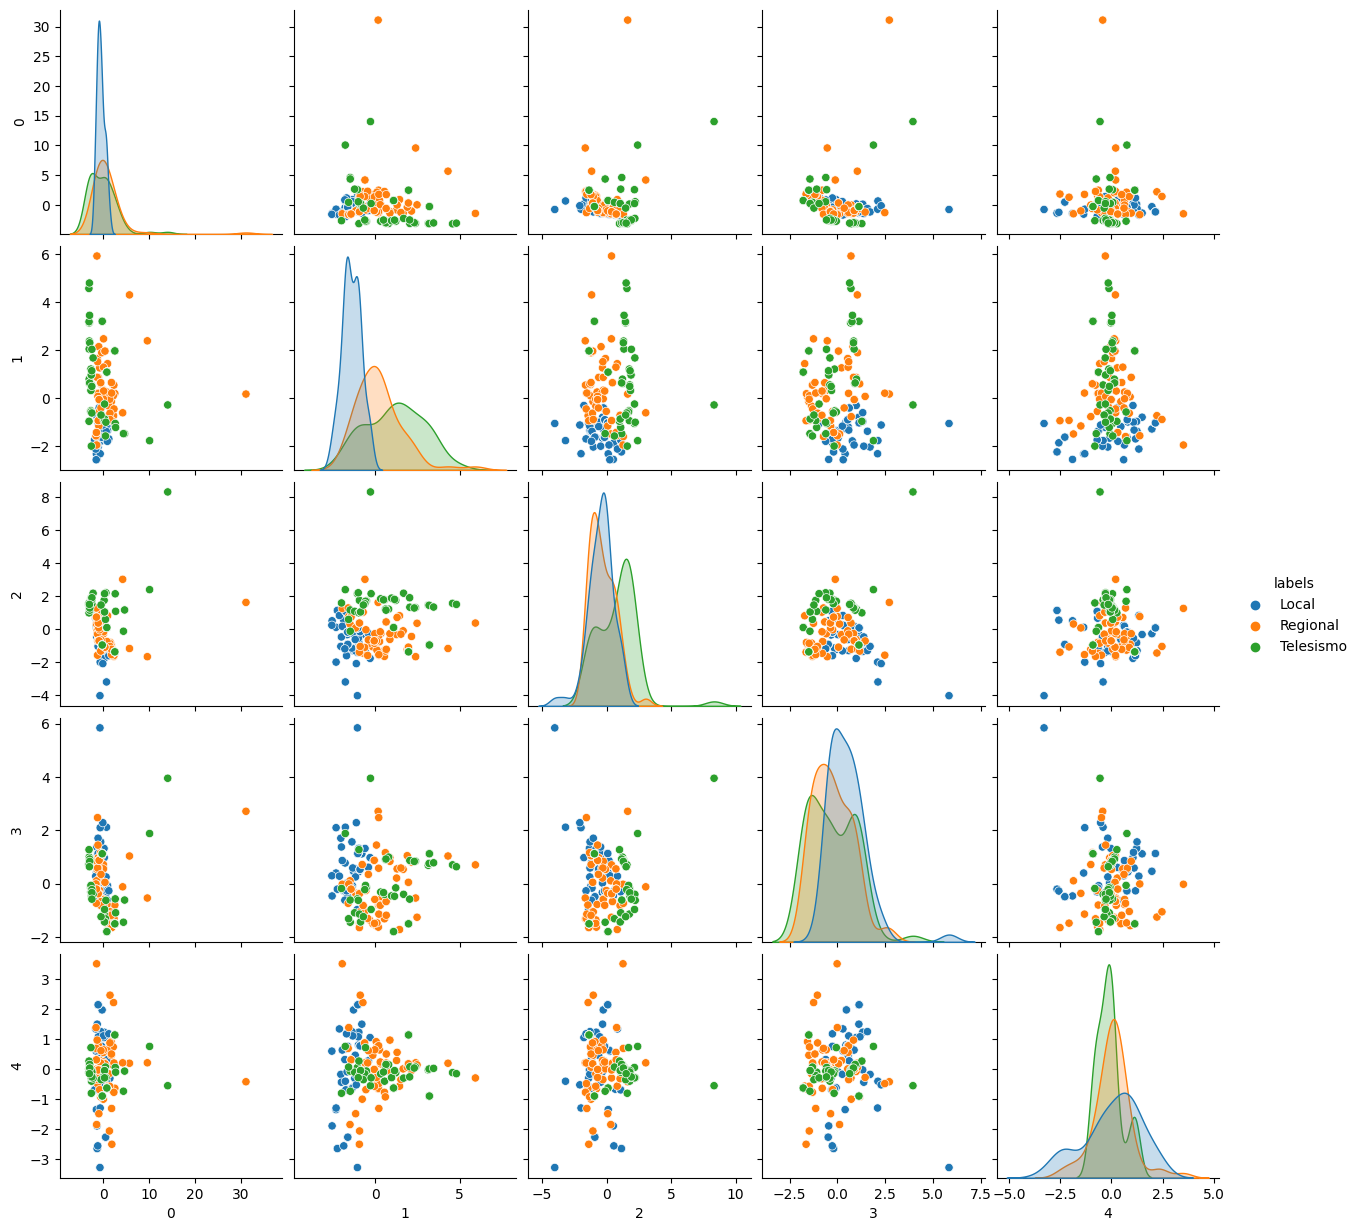

In [11]:
dataFramePCA= pd.DataFrame(XPCA5components)
dataFramePCA['labels'] = Y
sns.pairplot(dataFramePCA, hue='labels', palette= 'tab10')

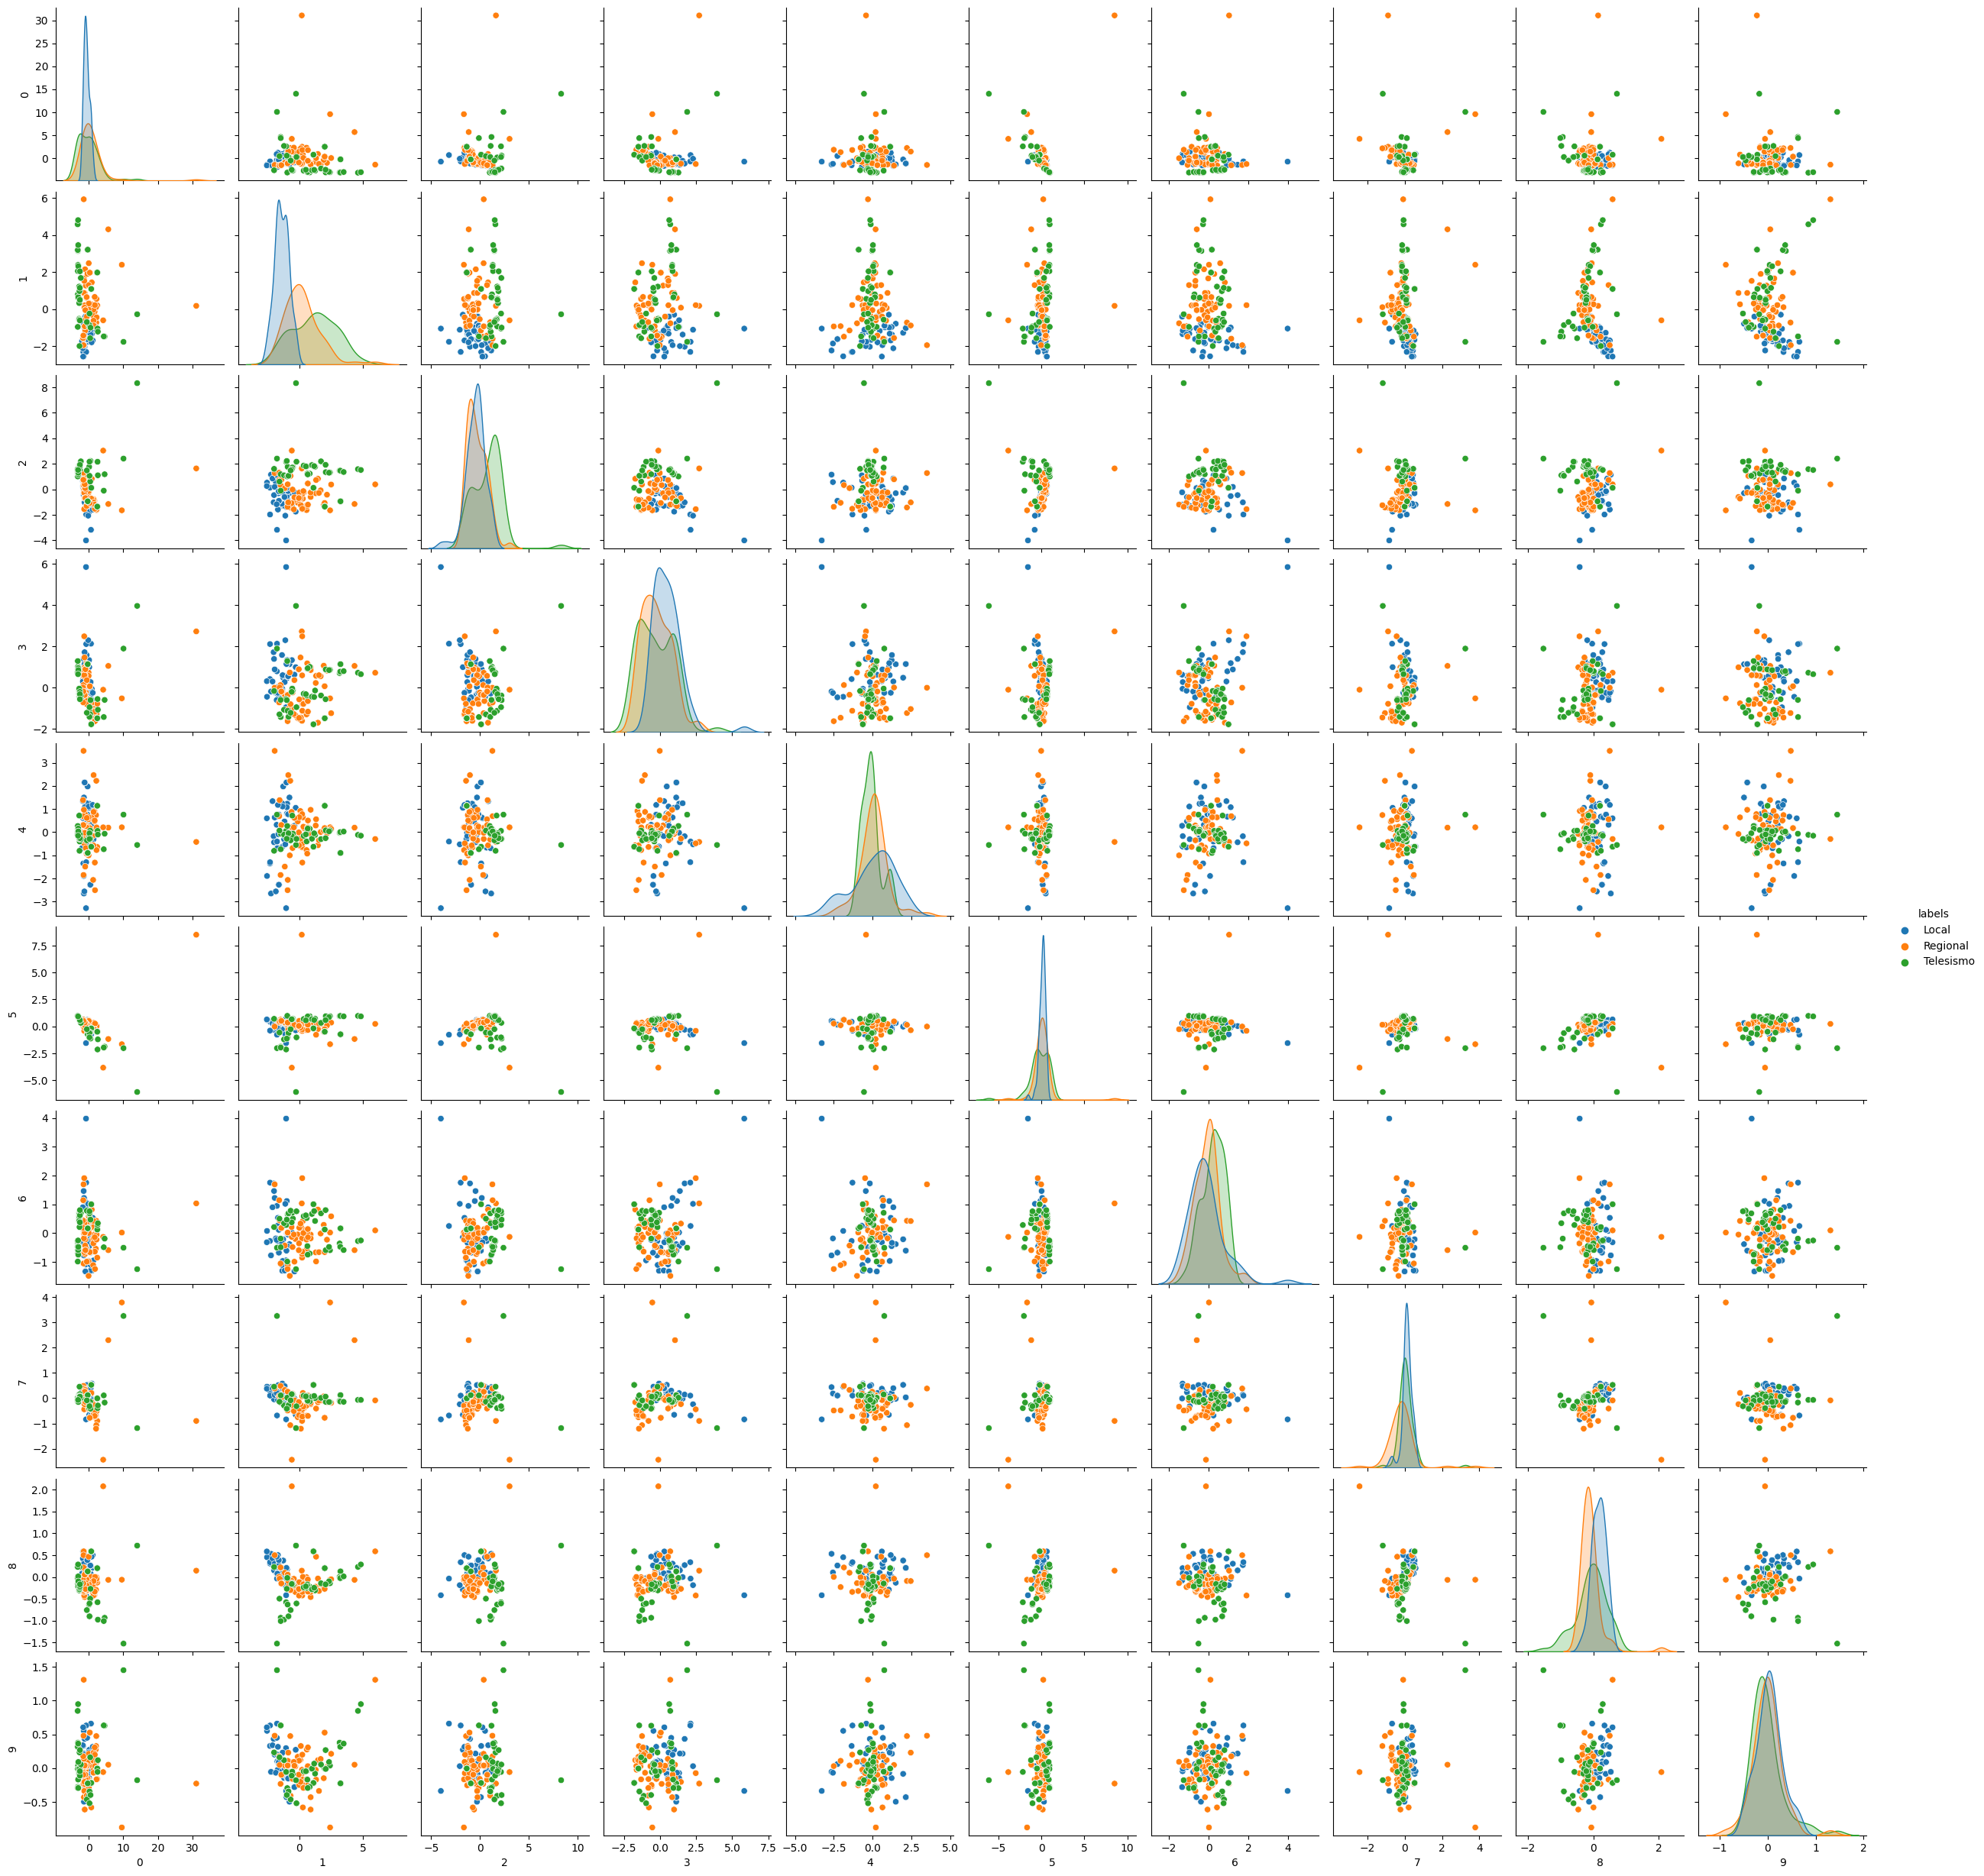

In [12]:
dataFramePCA= pd.DataFrame(XPCA10components)
dataFramePCA['labels'] = Y
sns.pairplot(dataFramePCA, hue='labels', palette= 'tab10')

## Entrenamiento de modelos lineales de clasificación: Regresión Logística y clasificación Bayesiana.

In [13]:
def Logistic_Regression(X, Y):
  # Dividimos el conjunto de datos en Entrenamiento y Test
  X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state = 3)

  # Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
  logreg = LogisticRegression(C=1e5)
  logreg.fit(X_train, y_train)

  # Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
  Acc_train = accuracy_score(y_train, logreg.predict(X_train))
  cMat_train = confusion_matrix(y_train, logreg.predict(X_train))

  Acc_test = accuracy_score(y_test, logreg.predict(X_test))
  cMat_test = confusion_matrix(y_test, logreg.predict(X_test))

  print('Acuracy Train: ',Acc_train)
  print('Acuracy Test: ',Acc_test)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

  ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['telesismo','local','regional']).plot(ax=ax1)
  ax1.ax_.set_title('Matriz Confusión LR Train')

  ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['telesismo','local','regional']).plot(ax=ax2)
  ax2.ax_.set_title('Matriz Confusión LR Test')
  plt.show()
  return None

def Bayessian_Clasication2(X, t):
  # Dividimos el conjunto de datos en Entrenamiento y Test
  X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state = 3)

  # Creamos un modelo de Clasificación Bayessiana y entrenamos los datos
  clfNB = GaussianNB()
  clfNB.fit(X_train, y_train) # para entrenar enviamos el conjunto de Entrenamient

  # Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
  Acc_train = accuracy_score(y_train, clfNB.predict(X_train))
  cMat_train = confusion_matrix(y_train, clfNB.predict(X_train))

  Acc_test = accuracy_score(y_test, clfNB.predict(X_test))
  cMat_test = confusion_matrix(y_test, clfNB.predict(X_test))

  print('Acuracy Train: ',Acc_train)
  print('Acuracy Test: ',Acc_test)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

  ConfusionMatrixDisplay(cMat_train, display_labels=['telesismo', 'local', 'regional']).plot(ax=ax1)
  ax1.set_title('Matriz Confusión LR Train')
  
  ConfusionMatrixDisplay(cMat_test, display_labels=['telesismo', 'local', 'regional']).plot(ax=ax2)
  ax2.set_title('Matriz Confusión LR Test')
  fig.tight_layout()
  plt.show()
  return None

## Evaluacion del Desempeño

1. Accuracy score
2. Confussion Matrix

## Regresión Logística

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acuracy Train:  0.8257575757575758
Acuracy Test:  0.7719298245614035


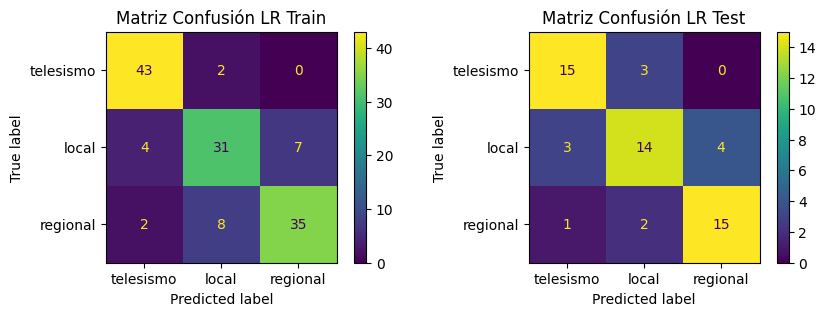

In [14]:
Logistic_Regression(X, Y)

Acuracy Train:  0.7196969696969697
Acuracy Test:  0.5964912280701754


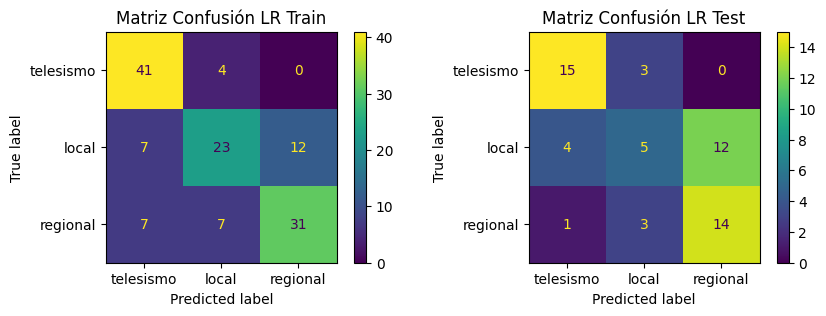

In [15]:
Logistic_Regression(XPCA2components, Y)

Acuracy Train:  0.8409090909090909
Acuracy Test:  0.8070175438596491


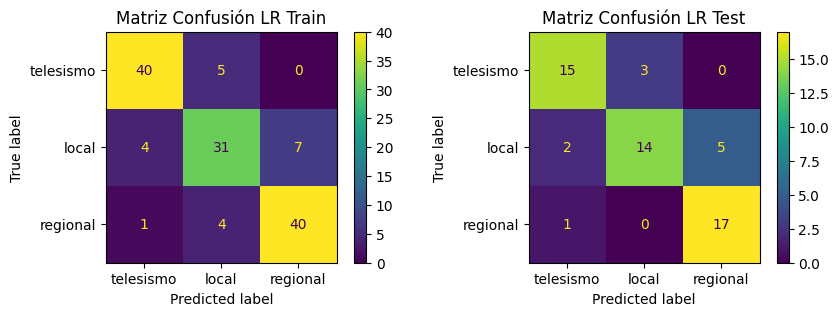

In [16]:
Logistic_Regression(XPCA5components, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acuracy Train:  0.9318181818181818
Acuracy Test:  0.8245614035087719


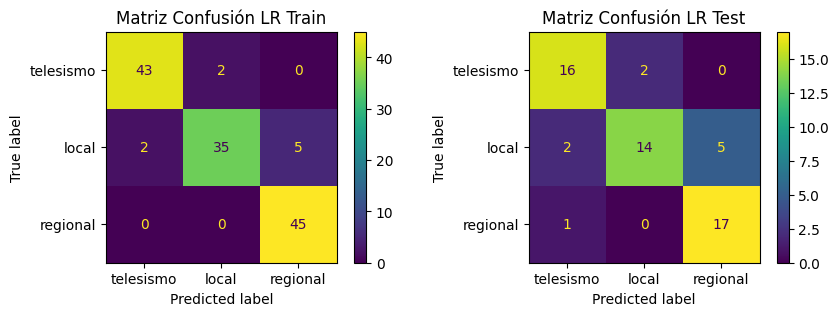

In [17]:
Logistic_Regression(XPCA10components, Y)

## Clasificación Bayesiano

Acuracy Train:  0.7878787878787878
Acuracy Test:  0.7192982456140351


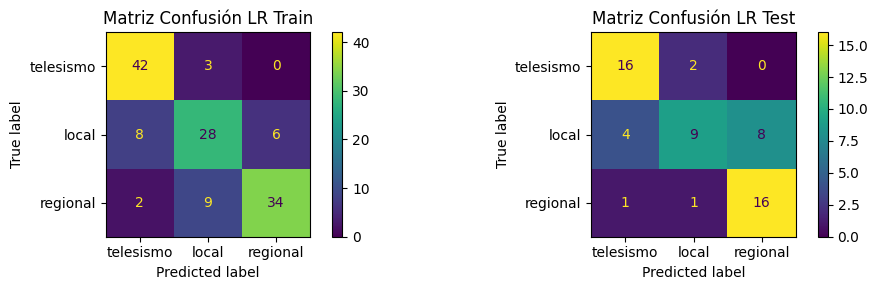

In [18]:
Bayessian_Clasication2(X,Y)

Acuracy Train:  0.6666666666666666
Acuracy Test:  0.631578947368421


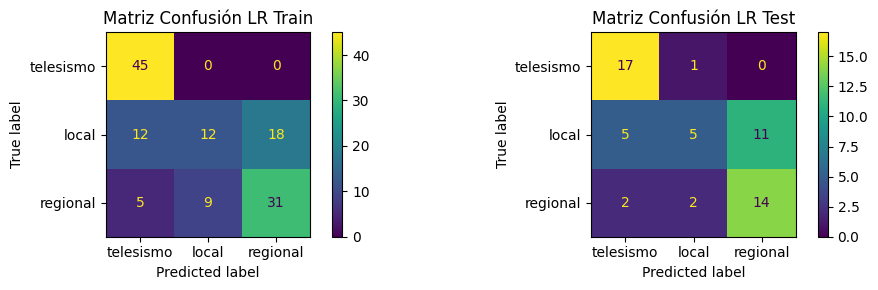

In [19]:
Bayessian_Clasication2(XPCA2components,Y)

Acuracy Train:  0.7727272727272727
Acuracy Test:  0.7192982456140351


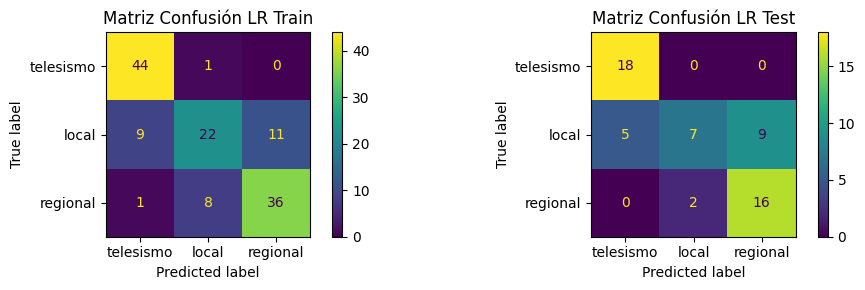

In [20]:
Bayessian_Clasication2(XPCA5components,Y)

Acuracy Train:  0.8484848484848485
Acuracy Test:  0.6666666666666666


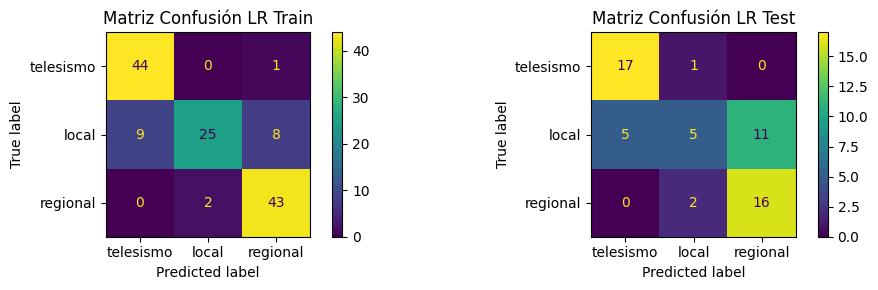

In [21]:
Bayessian_Clasication2(XPCA10components,Y)